In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize

# Método do Lagrangeano Aumentado

## Problema-Exemplo

Seja o seguinte problema de otimização restrito:

\begin{align}
    \mathbf{x^*} = \argmin_{\mathbf{x}} f(\mathbf{x})=~&(x_1-2)^4 + (x_1-2x_2)^2 \\
    \mathrm{sujeito~a~} h(\mathbf{x}):~& x_1^2 - x_2 = 0
\end{align}

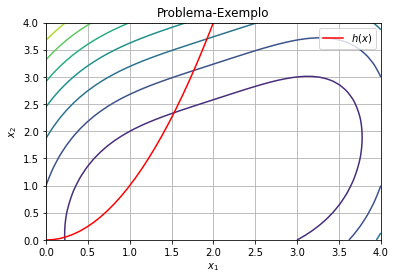

In [2]:
# Malha de pontos para gráfico de contorno
x1, x2 = np.meshgrid(np.linspace(0, 4),
                     np.linspace(0, 4))

# Função objetivo
f = (x1-2)**4 + (x1-2*x2)**2

# Adiciona o contorno na figura
plt.contour(x1, x2, f)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Problema-Exemplo')
plt.grid()

# Calcula e exibe curva de restrição h(x)
hx1 = np.linspace(0, 4)
hx2 = hx1**2
plt.plot(hx1, hx2, 'r', label=r'$h(x)$')
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.legend()

plt.show()

## Aplicação do ALM

Iteração 1 - x-ótimo: [1.25174094 0.73042431], lambda = 0.00, u = 1.00
Iteração 2 - x-ótimo: [1.13305035 0.75099957], lambda = 0.84, u = 1.20
Iteração 3 - x-ótimo: [1.06692619 0.7820654 ], lambda = 1.48, u = 1.44
Iteração 4 - x-ótimo: [1.02434049 0.81201941], lambda = 1.99, u = 1.73
Iteração 5 - x-ótimo: [0.99562883 0.83751789], lambda = 2.40, u = 2.07
Iteração 6 - x-ótimo: [0.9762152  0.85751081], lambda = 2.72, u = 2.49
Iteração 7 - x-ótimo: [0.96339814 0.87203936], lambda = 2.96, u = 2.99
Iteração 8 - x-ótimo: [0.95530359 0.88179368], lambda = 3.12, u = 3.58


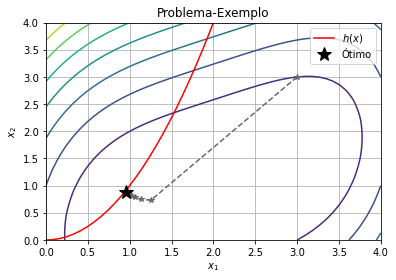

In [3]:
# Parâmetros iniciais
x = np.array([3, 3], dtype=float) # Ponto inicial
lam = 0. # Multiplicador de Lagrange (igualdade)
u = 1. # Constante de penalidade
alpha = 1.2 # Aceleração da penalização
k = 1 # Contador de iterações
precision = 1e-2
history = [x] # Histórico das variáveis de decisão
xlast = x.copy() # 

# Processo iterativo
while True:
    
    # Definição da função Lagrangeana que será a
    # função-objetivo do problema transformado
    def L(vars):
        x1, x2 = vars[0], vars[1]
        f = (x1-2)**4 + (x1-2*x2)**2 + lam*(x1**2-x2) + u/2*(x1**2-x2)**2
        return f
    
    # Resolve problema de otimização irrestrito
    solution = optimize.minimize(L, x, method='BFGS')
    
    # Atualização da variável de decisão
    x = solution.x
    
    print('Iteração %d' % k, end=' - ')
    print('x-ótimo: ' + str(x), end=', ')
    print('lambda = %.2f' % lam, end=', ')
    print('u = %.2f' % u)
    
    # Atualização do multiplicador de Lagrange
    lam = lam + u*(x[0]**2-x[1])
    
    # Atualização da constante de penalização
    u = alpha*u
    
    # Atualização das iterações
    k += 1
    
    # Salva informação do novo ponto encontrado
    history.append(x)
    
    if np.linalg.norm(x-xlast)/np.linalg.norm(x) < precision:
        break
    else:
        xlast = x.copy()
    
# Adiciona o contorno na figura
plt.contour(x1, x2, f)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Problema-Exemplo')
plt.grid()

# Calcula e exibe curva de restrição h(x)
hx1 = np.linspace(0, 4)
hx2 = hx1**2
plt.plot(hx1, hx2, 'r', label=r'$h(x)$')
plt.xlim([0, 4])
plt.ylim([0, 4])

# Exibe a trajetória do algoritmo
history = np.array(history)
plt.plot(history[:, 0], history[:, 1], '*--', color='dimgray')

# Marca a solução ótima do problema
plt.plot(x[0], x[1], '*k', label='Ótimo', markersize=15)
plt.legend()

plt.show()

## Adicionando uma restrição de desiguladade

\begin{align}
    \mathbf{x^*} = \argmin_{\mathbf{x}} f(\mathbf{x})=~&(x_1-2)^4 + (x_1-2x_2)^2 \\
    \mathrm{sujeito~a~} & \begin{cases} h_1(\mathbf{x}):~& x_1^2 - x_2 = 0 \\ h_2(\mathbf{x}):~& (x_1-2)^2 + (x_2-2)^2 - 1 = 0 \\ g_1(\mathbf{x}):~& x_1^2 + x_2 - 4 \le 0 \end{cases}
\end{align}

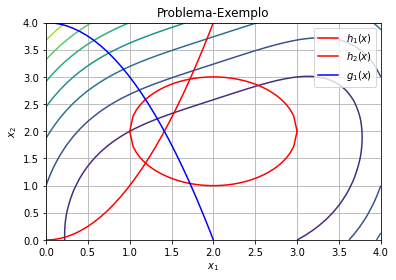

In [4]:
# Adiciona o contorno na figura
plt.contour(x1, x2, f)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Problema-Exemplo')
plt.grid()

# Calcula e exibe curva de restrição h1(x)
h1x1 = np.linspace(0, 4)
h1x2 = h1x1**2
plt.plot(h1x1, h1x2, 'r', label=r'$h_1(x)$')

# Calcula e exibe curva de restrição h2(x)
h2x1 = np.linspace(1, 3)
h2x2 = np.sqrt(1 - (h2x1 - 2)**2) + 2
plt.plot(h2x1, h2x2, 'r', label=r'$h_2(x)$')
h2x2 = -np.sqrt(1 - (h2x1 - 2)**2) + 2
plt.plot(h2x1, h2x2, 'r')

# Calcula e exibe curva de restrição g1(x)
g1x2 = 4 - h1x1**2
plt.plot(h1x1, g1x2, 'b', label=r'$g_1(x)$')
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.legend()

plt.show()

## Aplicando o ALM

Iteração 1 - x-ótimo: [1.37619536 0.94177051], lambda 1 = 0.00, lambda 2 = 0.00, mu 1 = 0.00, u = 1.00
Iteração 2 - x-ótimo: [1.29869416 1.07459146], lambda 1 = 0.95, lambda 2 = 0.51, mu 1 = 0.00, u = 1.20
Iteração 3 - x-ótimo: [1.25664136 1.17364601], lambda 1 = 1.69, lambda 2 = 0.93, mu 1 = 0.00, u = 1.44
Iteração 4 - x-ótimo: [1.23040246 1.2468933 ], lambda 1 = 2.27, lambda 2 = 1.27, mu 1 = 0.00, u = 1.73
Iteração 5 - x-ótimo: [1.21359574 1.30098129], lambda 1 = 2.73, lambda 2 = 1.54, mu 1 = 0.00, u = 2.07
Iteração 6 - x-ótimo: [1.20301541 1.34038918], lambda 1 = 3.09, lambda 2 = 1.76, mu 1 = 0.00, u = 2.49
Iteração 7 - x-ótimo: [1.19662565 1.36833074], lambda 1 = 3.35, lambda 2 = 1.94, mu 1 = 0.00, u = 2.99
Iteração 8 - x-ótimo: [1.1929817  1.38734252], lambda 1 = 3.54, lambda 2 = 2.07, mu 1 = 0.00, u = 3.58
Iteração 9 - x-ótimo: [1.19103921 1.39958128], lambda 1 = 3.67, lambda 2 = 2.17, mu 1 = 0.00, u = 4.30


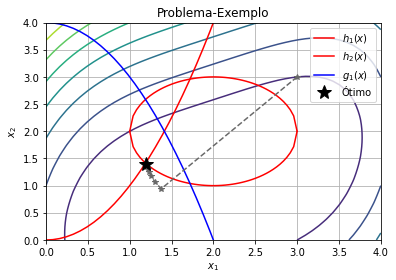

In [5]:
# Parâmetros iniciais
x = np.array([3, 3], dtype=float) # Ponto inicial
lam1 = 0. # Multiplicador de Lagrange (igualdade) p/ h1
lam2 = 0. # Multiplicador de Lagrange (igualdade) p/ h2
mu1 = 0. # Multiplicador de Lagrange (desigualdade) p/ g1
u = 1. # Constante de penalidade
alpha = 1.2 # Aceleração da penalização
k = 1 # Contador de iterações
precision = 1e-2
history = [x] # Histórico das variáveis de decisão
xlast = x.copy() # 

# Processo iterativo
while True:
    
    # Definição da função Lagrangeana que será a
    # função-objetivo do problema transformado
    def L(vars):
        x1, x2 = vars[0], vars[1]
        h1 = x1**2-x2
        h2 = (x1-2)**2 + (x2-2)**2 - 1
        g1 = x1**2 + x2 - 4
        f = (x1-2)**4 + (x1-2*x2)**2
        return f + lam1*h1 + u/2*h1**2 + lam2*h2 + u/2*h2**2 + mu1*g1 + u/2*max(0, g1)**2 
    
    # Resolve problema de otimização irrestrito
    solution = optimize.minimize(L, x, method='BFGS')
    
    # Atualização da variável de decisão
    x = solution.x
    
    print('Iteração %d' % k, end=' - ')
    print('x-ótimo: ' + str(x), end=', ')
    print('lambda 1 = %.2f' % lam1, end=', ')
    print('lambda 2 = %.2f' % lam2, end=', ')
    print('mu 1 = %.2f' % mu1, end=', ')
    print('u = %.2f' % u)
    
    # Atualização do multiplicador de Lagrange
    lam1 = lam1 + u*(x[0]**2-x[1])
    lam2 = lam2 + u*((x[0]-2)**2 + (x[1]-2)**2 - 1)
    mu1 = mu1 + u*max(x[0]**2 + x[1] - 4, -mu1/u)
    
    # Atualização da constante de penalização
    u = alpha*u
    
    # Atualização das iterações
    k += 1
    
    # Salva informação do novo ponto encontrado
    history.append(x)
    
    if np.linalg.norm(x-xlast)/np.linalg.norm(x) < precision:
        break
    else:
        xlast = x.copy()

# Adiciona o contorno na figura
plt.contour(x1, x2, f)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Problema-Exemplo')
plt.grid()

# Calcula e exibe curva de restrição h1(x)
h1x1 = np.linspace(0, 4)
h1x2 = h1x1**2
plt.plot(h1x1, h1x2, 'r', label=r'$h_1(x)$')

# Calcula e exibe curva de restrição h2(x)
h2x1 = np.linspace(1, 3)
h2x2 = np.sqrt(1 - (h2x1 - 2)**2) + 2
plt.plot(h2x1, h2x2, 'r', label=r'$h_2(x)$')
h2x2 = -np.sqrt(1 - (h2x1 - 2)**2) + 2
plt.plot(h2x1, h2x2, 'r')

# Calcula e exibe curva de restrição g1(x)
g1x2 = 4 - h1x1**2
plt.plot(h1x1, g1x2, 'b', label=r'$g_1(x)$')
plt.xlim([0, 4])
plt.ylim([0, 4])

# Exibe a trajetória do algoritmo
history = np.array(history)
plt.plot(history[:, 0], history[:, 1], '*--', color='dimgray')

# Marca a solução ótima do problema
plt.plot(x[0], x[1], '*k', label='Ótimo', markersize=15)
plt.legend()

plt.show()